In [2]:
# Credit Card Fraud Detection: Data Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set up plotting style
plt.style.use("default")
sns.set_palette("husl")
# "husl"是一個特定的色彩空間，提供均勻分布的鮮艷顏色
# husl stands for Hue(色調), Saturation(飽和度), Lightness(亮度)

print("=== Credit Card Fraud Detection Project ===")
print("Data Exploration and Understanding")
print("This project simulates risk modeling work similar to Visa's data science team")

=== Credit Card Fraud Detection Project ===
Data Exploration and Understanding
This project simulates risk modeling work similar to Visa's data science team


In [4]:
# ============================================================================
# 1. SPARK SESSION SETUP
# ============================================================================

print("\n1. Setting up Spark Session...")

# Create Spark Session for local environment
# 開始建立spark的建構器模式
# 命名
# 設置Driver程式的記憶體為4g
# 啟用自適應查詢執行。Spark會在運行時動態優化查詢計劃，並根據實際數據大小調整策略
# 啟用自適應分區合併
spark = SparkSession.builder \
    .appName("CreditCardFraudDetection") \
    .config("spark.driver.memory", "4g") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .getOrCreate()

print(f"Spark Version: {spark.version}")
print(f"Spark UI avaliable at: {spark.sparkContext.uiWebUrl}")


1. Setting up Spark Session...


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/07/28 07:52:37 WARN Utils: Your hostname, Howards-MacBook-Air.local, resolves to a loopback address: 127.0.0.1; using 10.74.245.116 instead (on interface en0)
25/07/28 07:52:37 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/28 07:52:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark Version: 4.0.0
Spark UI avaliable at: http://10.74.245.116:4040


In [5]:
# ============================================================================
# 2. DATA LOADING
# ============================================================================

df_spark = spark.read.csv("./creditcard_2023.csv", header=True, inferSchema=True)

print(f"Dataset shape: {df_spark.count()} rows, {len(df_spark.columns)} columns")
print(f"Column names: {df_spark.columns}")

# Display basic info about the dataset
print("\nDataset Schema:")
df_spark.printSchema()

Dataset shape: 568630 rows, 31 columns
Column names: ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Dataset Schema:
root
 |-- id: integer (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nul

In [6]:
# ============================================================================
# 3. INITIAL DATA EXPLORATION
# ============================================================================

print("\n3. Initial Data Exploration...")

df_pandas = df_spark.toPandas()
print(f"Memory Usage: {df_pandas.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Basic stats
df_pandas.describe()
# 

25/07/28 07:52:45 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.



3. Initial Data Exploration...


Memory Usage: 130.15 MB


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,5.837989e-17,-3.918650e-17,-3.358843e-17,1.059635e-17,3.998623e-17,...,2.539125e-17,3.623752e-18,-1.802504e-18,-1.469494e-17,-3.228888e-17,-7.797314e-18,-3.598760e-17,2.579112e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [7]:
# Check for missing values
print("\nMissing Values: ")
missing_values = df_pandas.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("No Missing Values!")


Missing Values: 
Series([], dtype: int64)
No Missing Values!


In [8]:
# ============================================================================
# 4. FRAUD DISTRIBUTION ANALYSIS
# ============================================================================
print("\n4. Fraud Distribution Analysis...")

fraud_distribution = df_pandas["Class"].value_counts()
fraud_percentage = df_pandas["Class"].value_counts(normalize=True)*100

print("Class Distribution:")
print(f"Normal transactions (Class 0): {fraud_distribution[0]:,}({fraud_percentage[0]:.3f}%)")
print(f"Fruad Transactions (Class 1): {fraud_distribution[1]:,}({fraud_percentage[1]:.3f}%)")


4. Fraud Distribution Analysis...
Class Distribution:
Normal transactions (Class 0): 284,315(50.000%)
Fruad Transactions (Class 1): 284,315(50.000%)


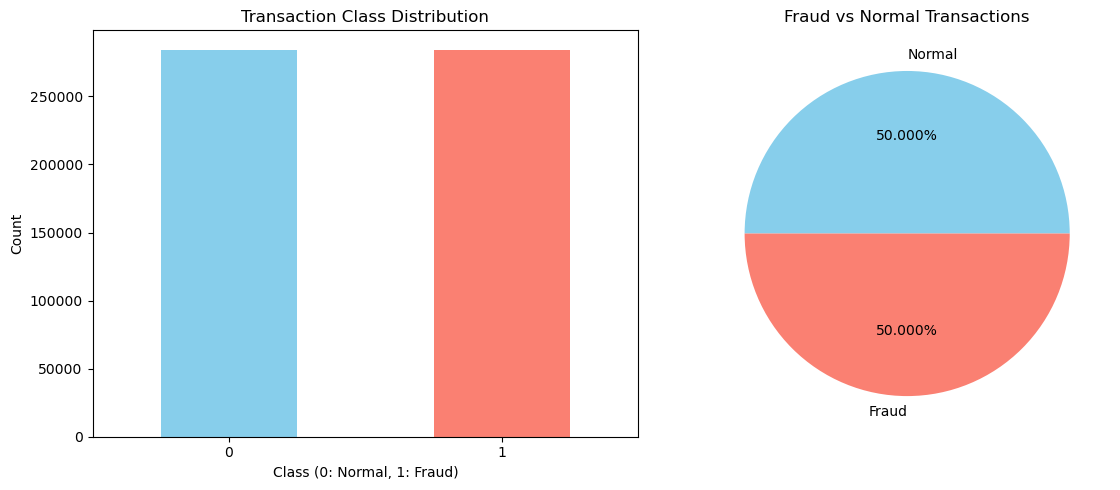

Note: This 50/50 distribution is unusual from real-world cases.
Real Credit Card fraud rates are around 0.1%~0.3%.
The balanced dataset allows us to focus on feature engineering and model performance


In [9]:
# Visualization 1: Class Distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
fraud_distribution.plot(kind="bar", color=['skyblue', 'salmon'])
plt.title("Transaction Class Distribution")
plt.xlabel("Class (0: Normal, 1: Fraud)")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.pie(fraud_distribution.values, labels=['Normal', 'Fraud'],
        autopct='%1.3f%%', colors=['skyblue', 'salmon'])
plt.title("Fraud vs Normal Transactions")

plt.tight_layout()
plt.show()

print("Note: This 50/50 distribution is unusual from real-world cases.")
print("Real Credit Card fraud rates are around 0.1%~0.3%.")
print("The balanced dataset allows us to focus on feature engineering and model performance")

In [10]:
# ============================================================================
# 5. TRANSACTION AMOUNT ANALYSIS
# ============================================================================
print("\n5. Transaction Amount Analysis...")

print("Amount Statistics by Class:")
amount_stats = df_pandas.groupby('Class')['Amount'].describe()
amount_stats


5. Transaction Amount Analysis...
Amount Statistics by Class:


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,12026.313506,6929.500715,50.12,6034.54,11996.90,18040.265,24039.93
1,284315.0,12057.601763,6909.750891,50.01,6074.64,12062.45,18033.780,24039.93


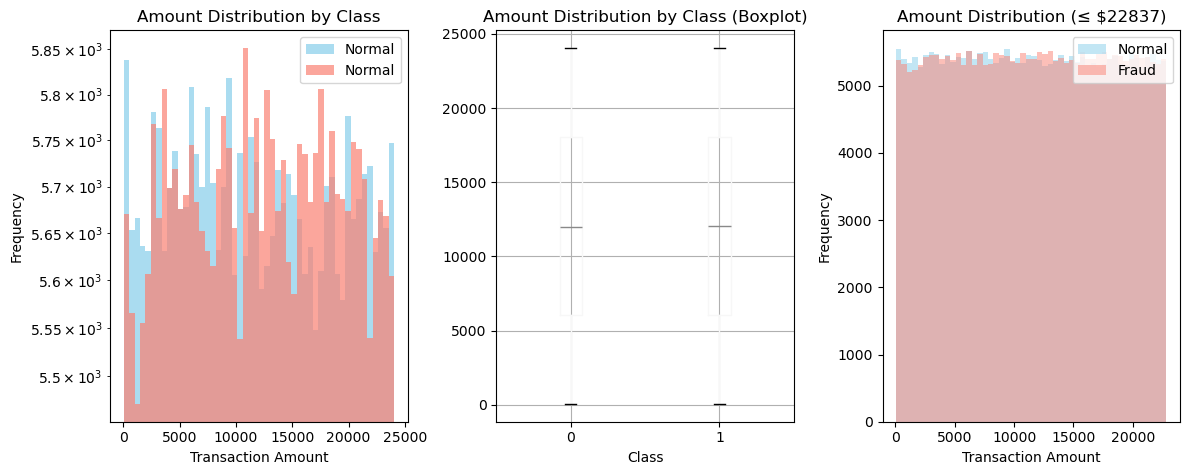

In [14]:
# Visualization 2: Amount Distribution
plt.figure(figsize=(12,5))

plt.subplot(1,3,1) # 創造一個1行3列的圖表網格，選擇第一個位置
# bins=將金額範圍分割為50個區間，更多bins=更細緻的分布
# alpha=transparency
plt.hist(df_pandas[df_pandas['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Normal', color='skyblue')
plt.hist(df_pandas[df_pandas['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Normal', color='salmon')
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Amount Distribution by Class")
plt.legend()
plt.yscale("log") # log scale due to class imbalance
# 何時使用log scale? 數據跨度很大(1vs1000)、極度不平衡的分類問題、金融數據

plt.subplot(1,3,2)
df_pandas.boxplot(column="Amount", by="Class", ax=plt.gca())
plt.title("Amount Distribution by Class (Boxplot)")
plt.suptitle('')

plt.subplot(1,3,3)
# Focus on smaller amounts for better visibility
amount_limit = df_pandas['Amount'].quantile(0.95)
subset = df_pandas[df_pandas['Amount']<=amount_limit]
plt.hist(subset[subset['Class'] == 0]['Amount'], bins=50, alpha=0.5, label="Normal", color='skyblue')
plt.hist(subset[subset['Class'] == 1]['Amount'], bins=50, alpha=0.5, label="Fraud", color='salmon')
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title(f"Amount Distribution (≤ ${amount_limit:.0f})")
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# Patterns using amount as an indicator are quite similar, meaning we can't use a single feature to predict frauds

In [15]:
# ============================================================================
# 6. ID FIELD ANALYSIS (NEW IN 2023 DATASET)
# ============================================================================
print("\n6. Transaction ID Analysis...")

# Check ID field uniqueness
unique_ids = df_pandas['id'].nunique()
total_records = len(df_pandas)
print(f"Unique IDs: {unique_ids}")
print(f"Total Records: {total_records}")
print(f"ID Uniqueness: {unique_ids == total_records}")
# Every ID is unique

# Check for an patterns in IDs
print(f"ID Range: {df_pandas['id'].min()} to {df_pandas['id'].max()}")


6. Transaction ID Analysis...
Unique IDs: 568630
Total Records: 568630
ID Uniqueness: True
ID Range: 0 to 568629


In [16]:
# ============================================================================
# 7. FEATURE CORRELATION ANALYSIS
# ============================================================================
print("\n7. Feature Correlation Analysis...")

# Select features for correlation analysis (excluding ID)
feature_cols = [col for col in df_pandas.columns if col.startswith("V")] + ["Amount", "Class"] # 篩選出所有以"V"開頭的欄位
correlation_matrix = df_pandas[feature_cols].corr()

# Plot correlation with target variable
target_corr = correlation_matrix['Class'].abs().sort_values(ascending=False)
print("Top 10 features correlated with fraud: ")
print(target_corr.head(10))


7. Feature Correlation Analysis...
Top 10 features correlated with fraud: 
Class    1.000000
V14      0.805669
V12      0.768579
V4       0.735981
V11      0.724278
V3       0.682095
V10      0.673665
V9       0.585522
V16      0.573511
V1       0.505761
Name: Class, dtype: float64


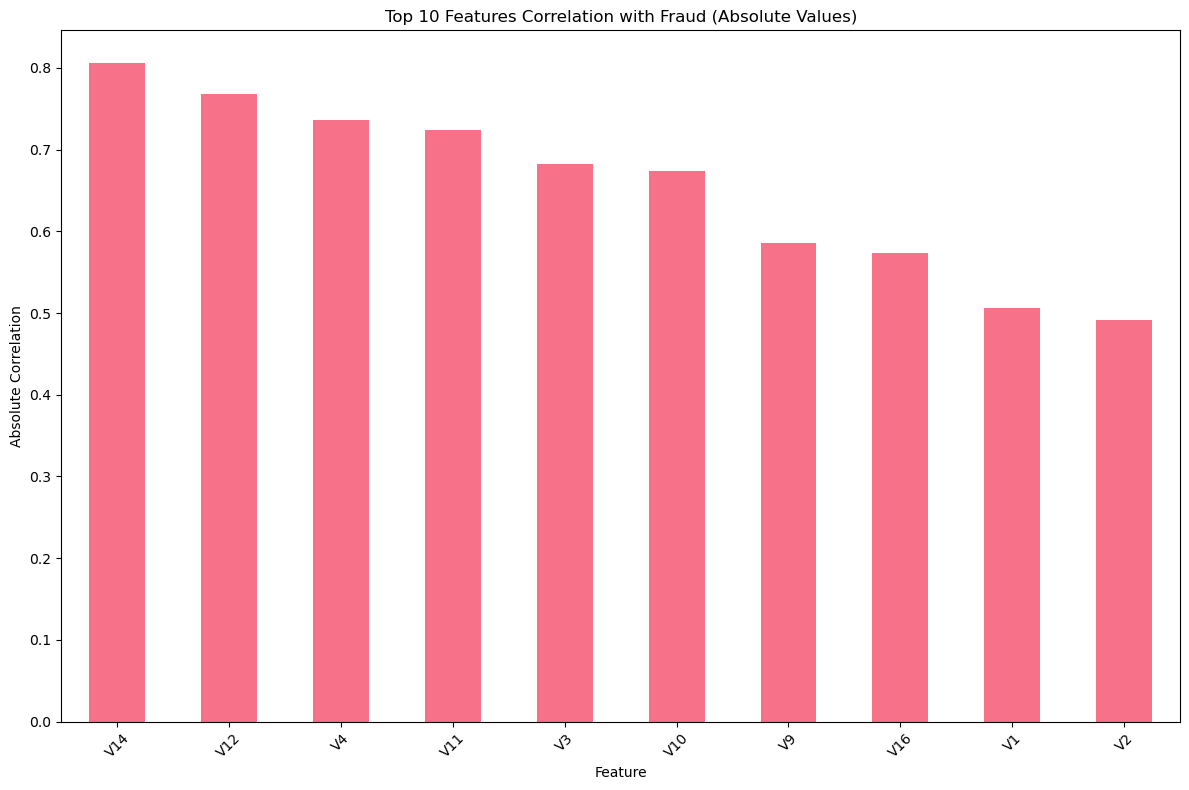

In [17]:
plt.figure(figsize=(12,8))
target_corr[1:11].plot(kind='bar')
plt.title("Top 10 Features Correlation with Fraud (Absolute Values)")
plt.xlabel("Feature")
plt.ylabel("Absolute Correlation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# ============================================================================
# 8. BUSINESS INSIGHTS SUMMARY
# ============================================================================
print("\n8. Key Business Insights from Initial Analysis:")
print("=" * 60)

total_transactions = len(df_pandas)
total_fraud = fraud_distribution[1]
total_amount = df_pandas['Amount'].sum()
fraud_amount = df_pandas[df_pandas['Class'] == 1]['Amount'].sum()

print(f"\n📊 Dataset Overview:")
print(f"   • Total transactions: {total_transactions:,}")
print(f"   • Fraud rate: {fraud_percentage[1]:.3f}%")
print(f"   • Data from: 2023 European cardholders")
print(f"   • Unique transaction IDs: {df_pandas['id'].nunique():,}")

print(f"\n💰 Financial Impact:")
print(f"   • Total transaction volume: ${total_amount:,.2f}")
print(f"   • Fraud transaction volume: ${fraud_amount:,.2f}")
print(f"   • Fraud amount percentage: {fraud_amount/total_amount*100:.3f}%")
print(f"   • Average fraud transaction: ${df_pandas[df_pandas['Class']==1]['Amount'].mean():.2f}")
print(f"   • Average normal transaction: ${df_pandas[df_pandas['Class']==0]['Amount'].mean():.2f}")

print(f"\n⚠️  Risk Modeling Challenges:")
if fraud_percentage[1] > 10:  # Check if dataset is balanced
    print(f"   • Balanced dataset: {fraud_percentage[0]:.1f}% vs {fraud_percentage[1]:.1f}%")
    print(f"   • Focus on precision/recall optimization")
else:
    print(f"   • Class imbalance: {fraud_percentage[0]:.1f}% vs {fraud_percentage[1]:.3f}%")
    print(f"   • Need specialized sampling/evaluation metrics")
print(f"   • PCA features (V1-V28) require careful interpretation")
print(f"   • No temporal features available for time-based analysis")

print(f"\n🎯 Next Steps for Model Development:")
if fraud_percentage[1] > 10:
    print(f"   • Leverage balanced dataset for robust training")
    print(f"   • Focus on feature engineering with V1-V28 and Amount")
else:
    print(f"   • Address class imbalance with SMOTE/undersampling")
print(f"   • Implement proper cross-validation strategy")
print(f"   • Focus on precision/recall rather than accuracy")
print(f"   • Create synthetic time features if needed")


8. Key Business Insights from Initial Analysis:

📊 Dataset Overview:
   • Total transactions: 568,630
   • Fraud rate: 50.000%
   • Data from: 2023 European cardholders
   • Unique transaction IDs: 568,630

💰 Financial Impact:
   • Total transaction volume: $6,847,418,369.75
   • Fraud transaction volume: $3,428,157,045.35
   • Fraud amount percentage: 50.065%
   • Average fraud transaction: $12057.60
   • Average normal transaction: $12026.31

⚠️  Risk Modeling Challenges:
   • Balanced dataset: 50.0% vs 50.0%
   • Focus on precision/recall optimization
   • PCA features (V1-V28) require careful interpretation
   • No temporal features available for time-based analysis

🎯 Next Steps for Model Development:
   • Leverage balanced dataset for robust training
   • Focus on feature engineering with V1-V28 and Amount
   • Implement proper cross-validation strategy
   • Focus on precision/recall rather than accuracy
   • Create synthetic time features if needed


In [1]:
# Feature Engineering 特徵工程
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.ml.stat import Correlation
from pyspark.ml import Pipeline

In [19]:
# ============================================================================
# 1. SPARK SESSION SETUP AND DATA LOADING
# ============================================================================
print("\n1. Setting up Spark Session for Advanced Feature Engineering...")

spark = SparkSession.builder \
    .appName("FraudDetection_FeatureEngineering") \
    .config("spark.driver.memory", "6g") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .config("spark.sql.adaptive.skewJoin.enabled", "true") \
    .getOrCreate()

print(f"Spark Version: {spark.version}")
print(f"Spark UI: {spark.sparkContext.uiWebUrl}")


1. Setting up Spark Session for Advanced Feature Engineering...
Spark Version: 4.0.0
Spark UI: http://10.74.245.116:4040


25/07/28 07:55:02 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [33]:
df = spark.read.csv("creditcard_2023.csv", header=True, inferSchema=True)
df = df.cache()
# 什麼是cache? 可以將數據暫存在記憶體中，避免重複從磁碟讀取，以加速後續操作
df.createOrReplaceTempView("transactions")
stats_result = spark.sql(stats_sql)

25/07/28 08:15:15 WARN CacheManager: Asked to cache already cached data.        


In [34]:
# ============================================================================
# 2. BASIC FEATURE STATISTICS WITH SPARK SQL
# ============================================================================
print("\n2. Computing Advanced Statistics with Spark SQL...")

stats_sql = """
SELECT 
    Class,
    COUNT(*) as transaction_count,
    ROUND(AVG(Amount), 2) as avg_amount,
    ROUND(STDDEV(Amount), 2) as stddev_amount,
    ROUND(MIN(Amount), 2) as min_amount,
    ROUND(MAX(Amount), 2) as max_amount,
    ROUND(PERCENTILE_APPROX(Amount, 0.25), 2) as q25_amount,
    ROUND(PERCENTILE_APPROX(Amount, 0.5), 2) as median_amount,
    ROUND(PERCENTILE_APPROX(Amount, 0.75), 2) as q75_amount,
    ROUND(PERCENTILE_APPROX(Amount, 0.95), 2) as p95_amount
FROM transactions 
GROUP BY Class
ORDER BY Class
"""

stats_result = spark.sql(stats_sql)
print("Amount Statistics by Class: ")
stats_result.show()


2. Computing Advanced Statistics with Spark SQL...
Amount Statistics by Class: 


+-----+-----------------+----------+-------------+----------+----------+----------+-------------+----------+----------+
|Class|transaction_count|avg_amount|stddev_amount|min_amount|max_amount|q25_amount|median_amount|q75_amount|p95_amount|
+-----+-----------------+----------+-------------+----------+----------+----------+-------------+----------+----------+
|    0|           284315|  12026.31|       6929.5|     50.12|  24039.93|   6034.51|     11996.35|  18039.55|  22842.05|
|    1|           284315|   12057.6|      6909.75|     50.01|  24039.93|   6074.14|     12062.01|  18031.51|  22828.18|
+-----+-----------------+----------+-------------+----------+----------+----------+-------------+----------+----------+



In [45]:
# ============================================================================
# 3. ADVANCED FEATURE ENGINEERING
# ============================================================================
print("\n3. Creating Advanced Features with Spark...")

# 3.1 Amount Based Features
# log1p = log(1+x)，可以用來解決金融數據中為0的數據，減少極端值的影響

df_features = df.withColumn("amount_log", log1p(col("Amount"))) \
                .withColumn("amount_sqrt", sqrt(col("Amount"))) \
                .withColumn("amount_squared", pow(col("Amount"), 2)) 
# if using pandas
# df['amount_log'] = np.log1p(df['Amount'])
# df['amount_sqrt'] = np.sqrt(df['Amount'])
# df['amount_squared'] = df['Amount']**2

# 3.2 Statistical features from V columns
v_columns = [f"V{i}" for i in range(1, 29)]

# Calculate sum and mean of V features
v_sum_expr = col("V1")
for v_col in v_columns[1:]:  
    v_sum_expr = v_sum_expr + col(v_col)

df_features = df_features.withColumn("v_sum", v_sum_expr) \
                        .withColumn("v_mean", v_sum_expr / lit(len(v_columns)))

# 3.3 Outlier Detection Features
# Z-score for amount (using Window functions for efficiency)
amount_stats = df_features.select(
    mean('Amount').alias('amount_mean'),
    stddev('Amount').alias('amount_std')
).collect()[0]

# 計算Z-score
df_features = df_features.withColumn("amount_zscore",
                                     (col("Amount") - lit(amount_stats["amount_mean"])) / lit(amount_stats['amount_std']))

# Outlier Flags
df_features = df_features.withColumn("amount_outlier",
                                     when(abs(col("amount_zscore")) > 3, 1).otherwise(0))

# 3.4 Percentile-based features
amount_percentiles = df_features.select(
    expr("percentile_approx(Amount, 0.25)").alias("p25"),
    expr("percentile_approx(Amount, 0.75)").alias("p75"),
    expr("percentile_approx(Amount, 0.90)").alias("p90"),
    expr("percentile_approx(Amount, 0.95)").alias("p95")
).collect()[0]

df_features = df_features.withColumn("amount_above_p90",
                                     when(col("Amount")>lit(amount_percentiles['p90']),1).otherwise(0)) \
                                    .withColumn("amount_above_p95",
                                                when(col("Amount")>lit(amount_percentiles['p95']),1).otherwise(0))

# 3.5 V-feature interactions
df_features = df_features.withColumn("v1_v2_interaction", col("V1") * col("V2")) \
                        .withColumn("v1_amount_ratio", col("V1") / (col("Amount") + 1)) \
                        .withColumn("v_features_range", 
                            greatest(*[col(c) for c in v_columns[:10]]) - 
                            least(*[col(c) for c in v_columns[:10]]))        

print("Feature engineering completed. New features added:")
new_features = ["amount_log", "amount_sqrt", "amount_squared", "v_sum", "v_mean", 
               "amount_zscore", "amount_outlier", "amount_above_p90", "amount_above_p95",
               "v1_v2_interaction", "v1_amount_ratio", "v_features_range"]
for feature in new_features:
    print(f"  • {feature}")


3. Creating Advanced Features with Spark...
Feature engineering completed. New features added:
  • amount_log
  • amount_sqrt
  • amount_squared
  • v_sum
  • v_mean
  • amount_zscore
  • amount_outlier
  • amount_above_p90
  • amount_above_p95
  • v1_v2_interaction
  • v1_amount_ratio
  • v_features_range
